# Project 2 - Advanced Methods in Applied Statistics 2024 - Emilie Jessen

In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy 

In [48]:
# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}
mpl.rc('font', **font)

axes = {'facecolor': 'ghostwhite'}
mpl.rc('axes', **axes)

# Add grid
mpl.rc('axes', grid=True)

# Set custom color cycle
custom_colors= ['dodgerblue', 'red', 'limegreen', 'orange', 'orchid']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)

# Set inside tickmarks
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True

# Exercise 1a

In [49]:
save_plots = False

In [50]:
def PDF(E, M): 
    T = 1.057 * 10**13 / M 
    a = np.exp(E/T) - 1
    b = np.exp(E/T) + 3
    c = np.exp(E/T) + 1
    func = a / (b * c)
    func /= scipy.integrate.trapz(func, E)
    return func

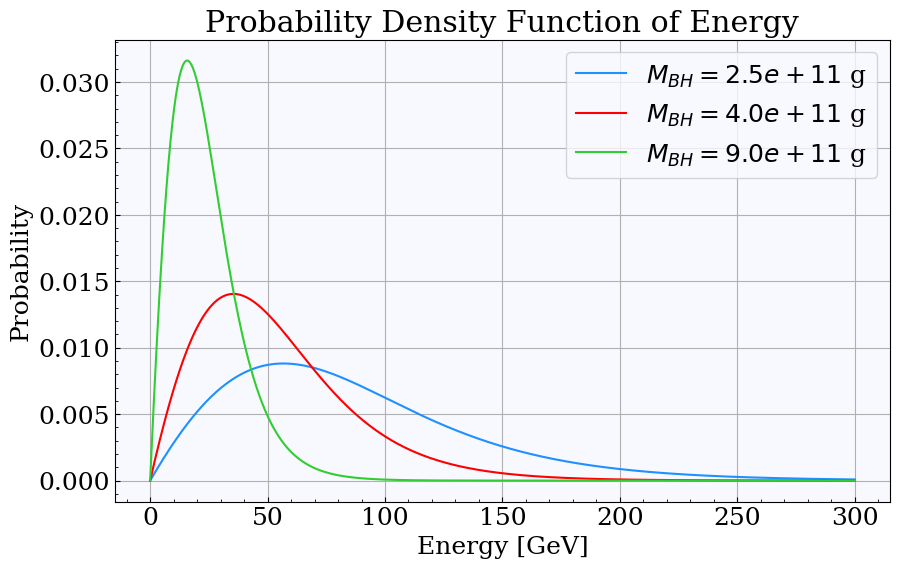

In [51]:
M_bh = np.array([2.5, 4, 9]) * 10**11  # Grams 
E = np.linspace(0, 300, 1000)
norm_PDF = np.array([PDF(E, M) for M in M_bh])

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

for i in range(len(M_bh)):
    ax.plot(E, norm_PDF[i], label=f'$M_{{BH}} = {M_bh[i]:.1e}$ g')

ax.set_xlabel('Energy [GeV]')
ax.set_ylabel('Probability')
ax.set_title('Probability Density Function of Energy')
ax.legend();

# Exercise 1b

In [57]:
data = pd.read_csv('neutrino_energies.csv', header=0, names=['E'])

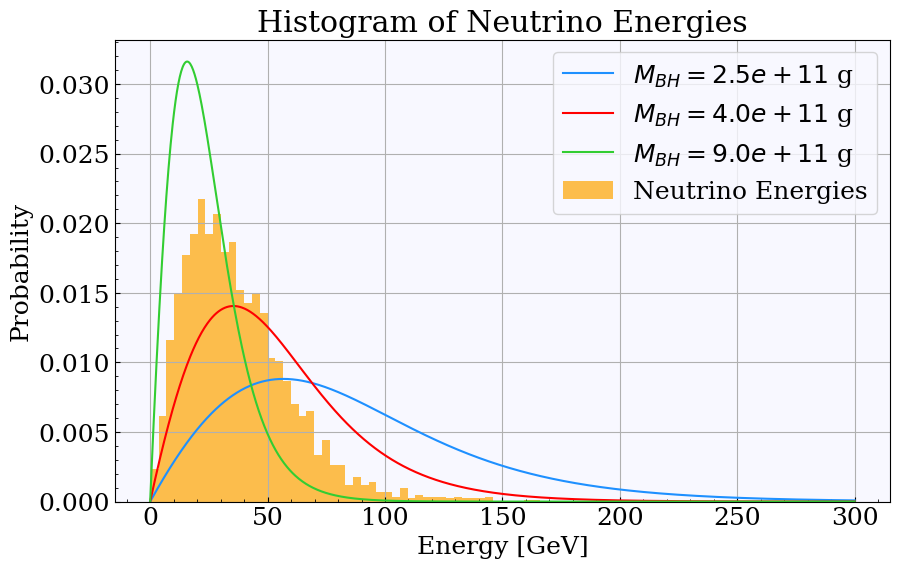

In [58]:
# Historgram of neutrino energies

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

for i in range(len(M_bh)):
    ax.plot(E, norm_PDF[i], label=f'$M_{{BH}} = {M_bh[i]:.1e}$ g')

ax.hist(data['E'].to_numpy(), bins=50, density=True, alpha=0.7, label='Neutrino Energies')
ax.set_xlabel('Energy [GeV]')
ax.set_ylabel('Probability')
ax.set_title('Histogram of Neutrino Energies')
ax.legend();

# Exercise 1c

Make a 1D raster scan of the unbinned ln-likelihood of the neutrino energy data for a reasonable range of the black hole masses

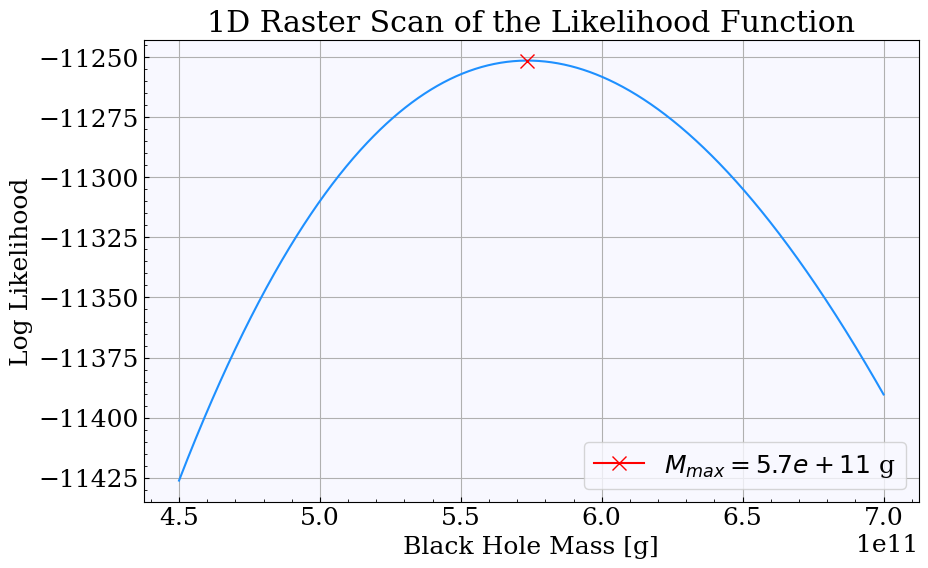

In [79]:
# 1D raster scan of the likelihood function for the black hole mass

def ln_likelihood(data, M, func=PDF):
    return np.sum(np.log(func(np.sort(data), M)))

M_scan = np.linspace(4.5, 7, 1000) * 10**11
L = np.array([ln_likelihood(data['E'].to_numpy(), M, PDF) for M in M_scan])
L_max, M_max = np.max(L), M_scan[np.argmax(L)]

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(M_scan, L)
ax.plot(M_max, L_max, marker='x', ms=10, color='red', label=f'$M_{{max}} = {M_max:.1e}$ g')
ax.set_xlabel('Black Hole Mass [g]')
ax.set_ylabel('Ln Likelihood')
ax.set_title('1D Raster Scan of the Likelihood Function')
ax.legend();




    